<a href="https://colab.research.google.com/github/Pamela1005/Natural-language-processor/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


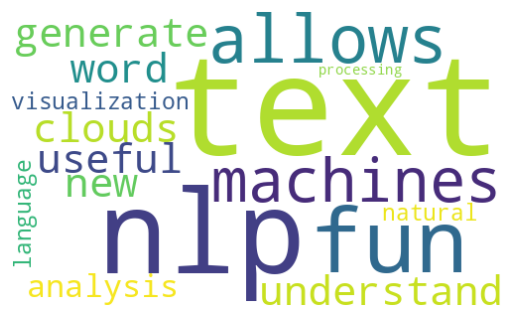

Top 10 Bigrams:
[(('nlp', 'fun'), 1), (('fun', 'nlp'), 1), (('nlp', 'allows'), 1), (('allows', 'machines'), 1), (('machines', 'understand'), 1), (('understand', 'text'), 1), (('text', 'generate'), 1), (('generate', 'new'), 1), (('new', 'text'), 1), (('text', 'word'), 1)]

Top 10 Trigrams:
[(('nlp', 'fun', 'nlp'), 1), (('fun', 'nlp', 'allows'), 1), (('nlp', 'allows', 'machines'), 1), (('allows', 'machines', 'understand'), 1), (('machines', 'understand', 'text'), 1), (('understand', 'text', 'generate'), 1), (('text', 'generate', 'new'), 1), (('generate', 'new', 'text'), 1), (('new', 'text', 'word'), 1), (('text', 'word', 'clouds'), 1)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

# Download required resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab") # Download punkt_tab resource

# Input paragraph
text = """NLP is fun. NLP allows machines to understand text
and generate new text. Word clouds and n-grams are useful for
text analysis and visualization in natural language processing."""

# Step 1: Tokenize into words (convert to lowercase)
words = nltk.word_tokenize(text.lower())

# Step 2: Remove stopwords & punctuation
stop_words = set(stopwords.words("english"))
words = [word for word in words if word.isalnum() and word not in stop_words]

# Step 3: Generate Word Cloud
wc = WordCloud(width=500, height=300, background_color="white").generate(" ".join(words))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Step 4: Generate bigrams & trigrams
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Print top 10 bigrams and trigrams with frequencies
print("Top 10 Bigrams:")
print(Counter(bigrams).most_common(10))

print("\nTop 10 Trigrams:")
print(Counter(trigrams).most_common(10))

In [ ]:
import nltk
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

nltk.download("stopwords")
from nltk.corpus import stopwords

data = {
    "text": [
        "I love this product, it works great!",
        "This is the best movie I have seen.",
        "Absolutely fantastic experience.",
        "I hate this item, waste of money.",
        "Worst service ever, very disappointed.",
        "Terrible movie, not worth the time."
    ],
    "label": [1, 1, 1, 0, 0, 0]
}

df = pd.DataFrame(data)

stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = text.lower()
    text = "".join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(preprocess)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset

# Sample dataset (replace with larger dataset if available)
data = {
    "text": [
        "I love this product, it is amazing!",
        "Worst purchase ever, total waste of money.",
        "This movie was fantastic, really enjoyed it.",
        "I hate this item, very disappointing.",
        "Absolutely wonderful experience, highly recommend.",
        "Terrible quality, not worth buying."
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}
df = pd.DataFrame(data)

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["text"], df["label"], test_size=0.3, random_state=42
)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding=True)

# Convert to HuggingFace Dataset
train_dataset = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
test_dataset = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training setup
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch", # Changed from evaluation_strategy
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Fine-tune
trainer.train()

# Evaluation
predictions = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(predictions.predictions), dim=1)

print("\nClassification Report:\n", classification_report(test_labels, preds))

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-412369838.py:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter: